# 1.Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from currency_converter import CurrencyConverter
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# parameters
filename = "base.xlsx"

In [3]:
# other constants
index_start = 6
base_currency = "DKK"
custom_figsize = (10, 6)
c = CurrencyConverter()

In [4]:
def convert_currency(amount, old_currency, new_currency):
    available_currencies = list(c.currencies)
    if old_currency == "AED" and new_currency == base_currency:
        return amount * 1.81
    if old_currency == base_currency:
        return amount
    else:
        return c.convert(amount, new_currency, base_currency)

In [5]:
def parse_report(filename):
    data = pd.read_excel(filename, skiprows=index_start)
    
    # set column names
    for row, item in data.iterrows():
        if item[0] == "Voucher":
            column_names = list(item)
            data.columns = column_names
            break
    
    # list of rows to delete
    rows_to_delete = []

    for row, item in data.iterrows():
        if "Worker name" in list(item): # finds worker name
            # this is horrible, fix it
            worker_name = item["Expense category"]
        transaction_amount = item["Transaction amount"]
        if isinstance(transaction_amount, float) or isinstance(transaction_amount, int): # has to be string or float
            if not np.isnan(transaction_amount): # cannot be NaN
                data.loc[row,'Worker name'] = worker_name
            else:
                rows_to_delete.append(row)  
        else:
            rows_to_delete.append(row)
            
    # get clean data
    clean_data = data.drop(rows_to_delete)
    clean_data.head()
    clean_data = clean_data[['Voucher','Expense report number', "Expense category", "Payment method", "Transaction amount", "Currency", "Worker name"]]
    clean_data = clean_data.reset_index(drop=True)
    
    # convert currencies
    for row, item in clean_data.iterrows():
        if item["Currency"] != "USD":
            amount = item["Transaction amount"]
            row_currency = item["Currency"]
            item["Transaction amount"] = convert_currency(amount, row_currency, base_currency)
            item["Currency"] = base_currency
            
    # to numeric
    clean_data['Transaction amount clean'] = pd.to_numeric(clean_data['Transaction amount'])
    
    return clean_data

In [6]:
clean_data = parse_report(filename)
print("Extract of data:")
clean_data.head(30)

Extract of data:


,Voucher,Expense report number,Expense category,Payment method,Transaction amount,Currency,Worker name,Transaction amount clean
0,DKTEGV018104,DKEXP032113,Other_Travel,EC,590.96,DKK,Henning Toft Schwarz,590.96
1,DKTEGV018104,DKEXP032113,Meals,EC,386.53,DKK,Henning Toft Schwarz,386.53
2,DKTEGV018104,DKEXP032113,Hardware,EC,1774.82,DKK,Henning Toft Schwarz,1774.82
3,DKTEGV018104,DKEXP032113,Meals,EC,401.29,DKK,Henning Toft Schwarz,401.29
4,DKTEGV018104,DKEXP032113,Meals,EC,1818.47,DKK,Henning Toft Schwarz,1818.47
5,DKTEGV018104,DKEXP032113,Other_Travel,EC,115,DKK,Henning Toft Schwarz,115.00
6,DKTEGV018104,DKEXP032113,Meals,EC,87.82,DKK,Henning Toft Schwarz,87.82
7,DKTEGV018104,DKEXP032113,Meals,EC,52.9,DKK,Henning Toft Schwarz,52.90
8,DKTEGV018104,DKEXP032113,Parking,EC,1100,DKK,Henning Toft Schwarz,1100.00
9,DKTEGV018104,DKEXP032113,Hotels Not DK,EC,1475.01,DKK,Henning Toft Schwarz,1475.01


# Table of Contents
   - [2.1. What was the total spending?](#2.1)
   - [2.2. What was the total number of transactions?](#2.2)
   - [2.3. What was the biggest transaction?](#2.3)
   - [2.4. In what categories do we spend more?](#2.4)
   - [2.5. What workers spend more?](#2.5)
   - [2.6. What workers spend more often?](#2.6)
   - [2.7. Who spends more on average?](#2.7)
   - [2.8. Detail of a worker's spending?](#2.8)
   - [2.9. Biggest spenders per category?](#2.9)

# 2.Expense Report Analysis

*Automatic report built by Duarte O.Carmo, contact me [here](mailto:docarmo@jabra.com).*




In [7]:
print(f"Report generation date: {datetime.now().date()}")
print(f"Report generation file: {filename}")

Report generation date: 2019-06-26
Report generation file: base.xlsx


## 2.1.What was the total spending? <a class="anchor" id="2.1"></a>

In [8]:
total_transacted_amount = clean_data["Transaction amount clean"].sum()
print(f"Total Spending in this period was: {total_transacted_amount:,} {base_currency}")

Total Spending in this period was: 916,815.15 DKK


## 2.2.What was the total number of transactions? <a class="anchor" id="2.2"></a>

In [9]:
total_transacted_amount = clean_data["Transaction amount clean"].count()
print(f"Total number of transactions: {total_transacted_amount:.0f}")

Total number of transactions: 1024


## 2.3.What was the biggest transaction? <a class="anchor" id="2.3"></a>

In [10]:
transaction_max_index = clean_data['Transaction amount clean'].idxmax()
transaction_max_worker = clean_data.loc[transaction_max_index]["Worker name"]
transaction_max_cat = clean_data.loc[transaction_max_index]["Expense category"]
transaction_max_value = clean_data.loc[transaction_max_index]["Transaction amount clean"]
print(f"Biggest single transaction details:\n\nName: {transaction_max_worker}\nCategory: {transaction_max_cat}\nValue: {transaction_max_value:,} {base_currency}")

Biggest single transaction details:

Name: Tero Tolonen
Category: Travel_Intl_Flight
Value: 35,175.76 DKK


## 2.4.In what categories do we spend more? <a class="anchor" id="2.4"></a>

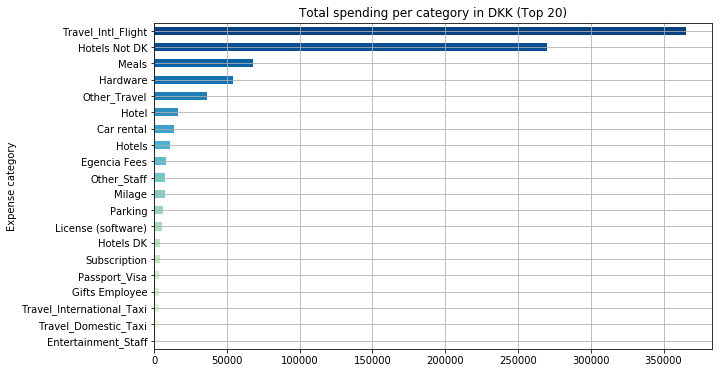

In [11]:
top = 20
colors = plt.cm.GnBu(np.linspace(0, 1, top))
plt.title(f"Total spending per category in {base_currency} (Top {top})")
clean_data.groupby('Expense category')["Transaction amount clean"].sum().sort_values().iloc[-top:].plot(kind='barh', figsize=custom_figsize, grid=True, color=colors)

## 2.5.What workers spend more? <a class="anchor" id="2.5"></a>

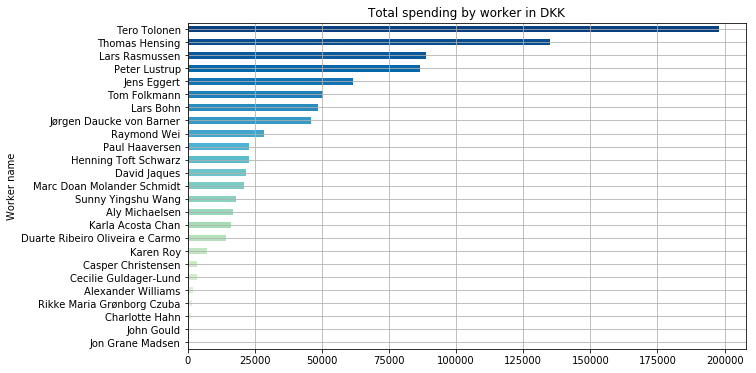

In [12]:
colors = plt.cm.GnBu(np.linspace(0, 1, len(clean_data['Worker name'].unique().tolist())))
plt.title(f"Total spending by worker in {base_currency}")
clean_data.groupby('Worker name')["Transaction amount clean"].sum().sort_values().plot(kind='barh', figsize=custom_figsize, grid=True, rot=0, color=colors)

## 2.6.What workers spend more often? <a class="anchor" id="2.6"></a>

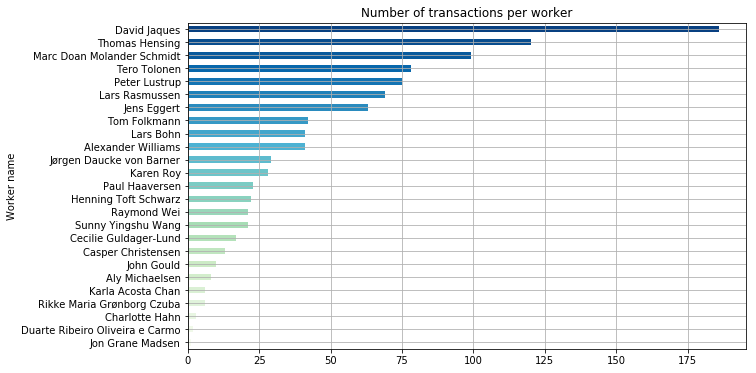

In [13]:
plt.title("Number of transactions per worker")
clean_data.groupby('Worker name')["Transaction amount clean"].count().sort_values().plot(kind='barh', figsize=custom_figsize, grid=True, color=colors)

## 2.7.Who spends more on average? <a class="anchor" id="2.7"></a>

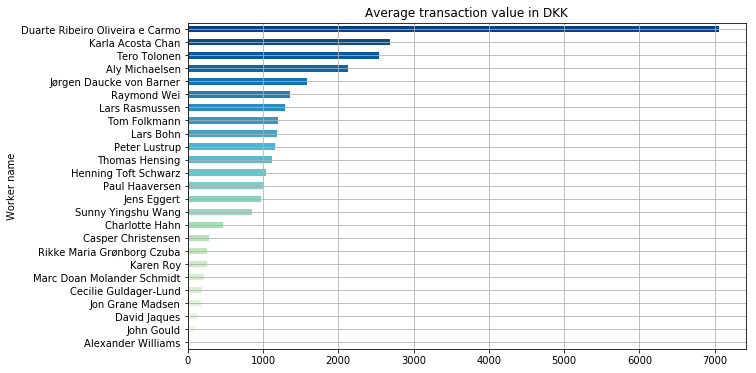

In [14]:
plt.title(f"Average transaction value in {base_currency}")
clean_data.groupby('Worker name')["Transaction amount clean"].mean().sort_values().plot(kind='barh', figsize=custom_figsize, grid=True, color=colors)

## 2.8.Detail of a worker's spending? <a class="anchor" id="2.8"></a>

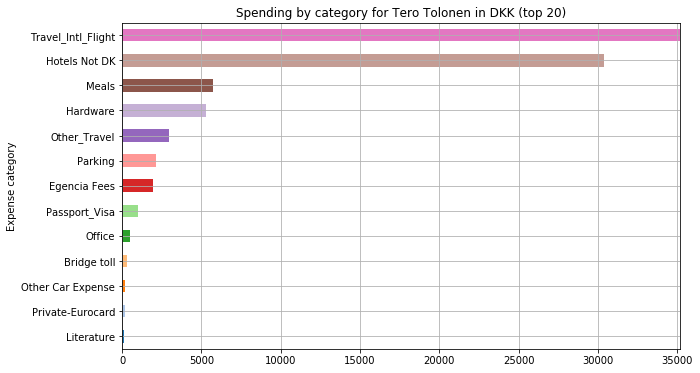

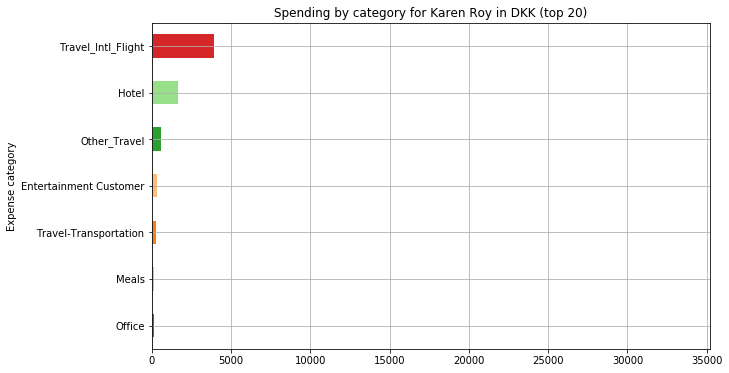

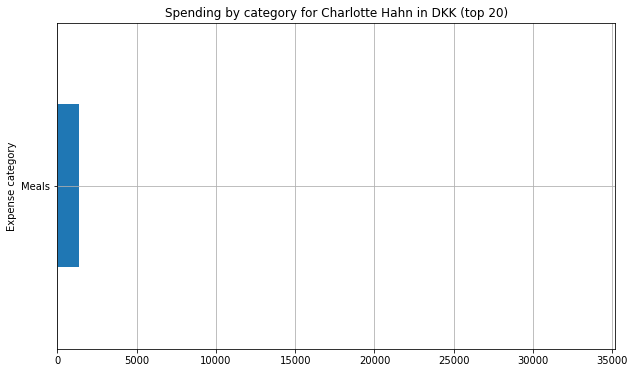

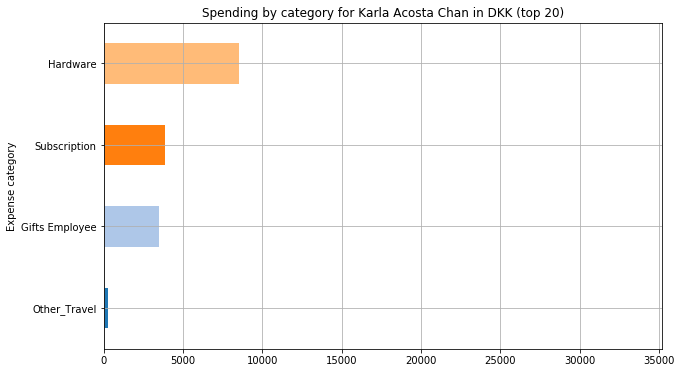

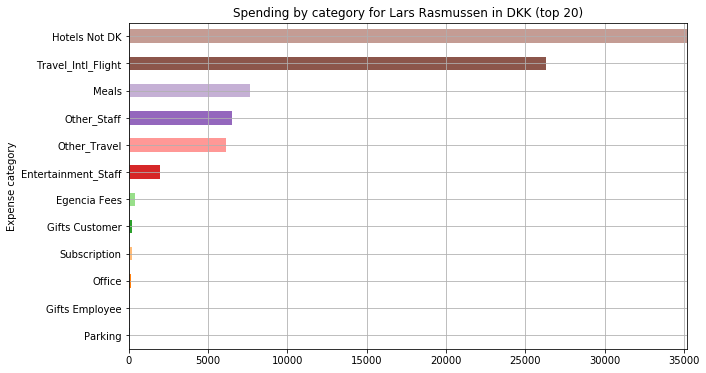

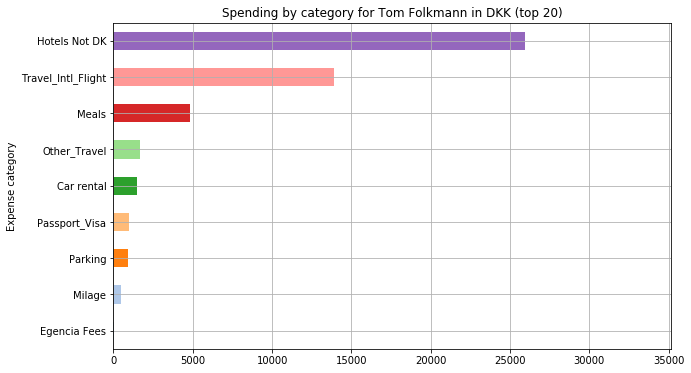

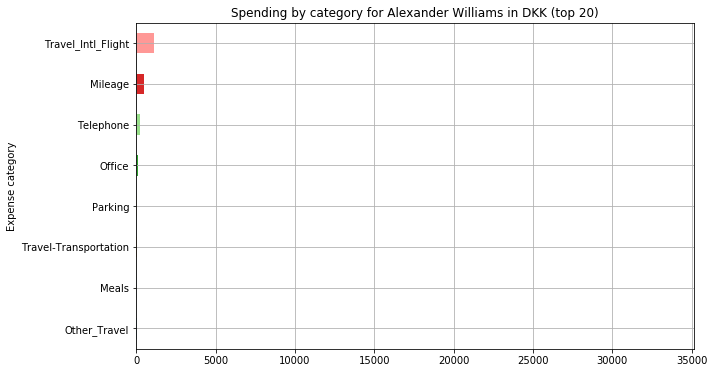

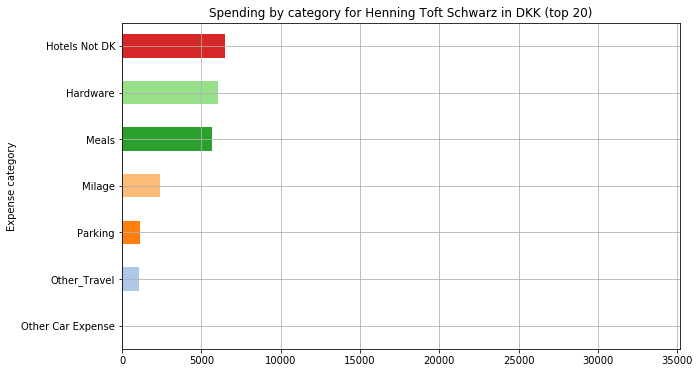

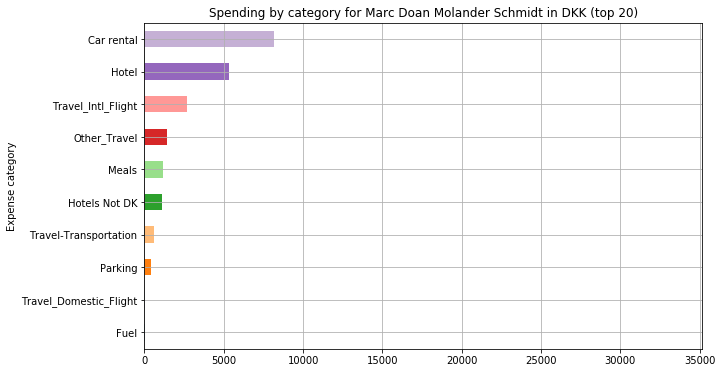

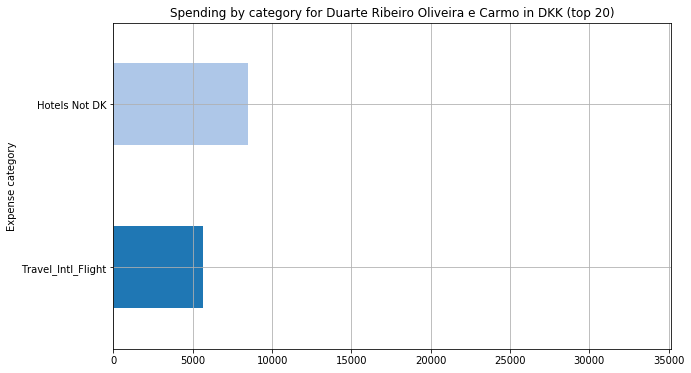

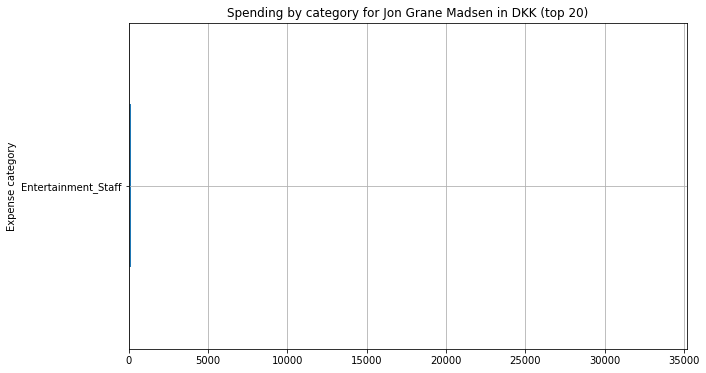

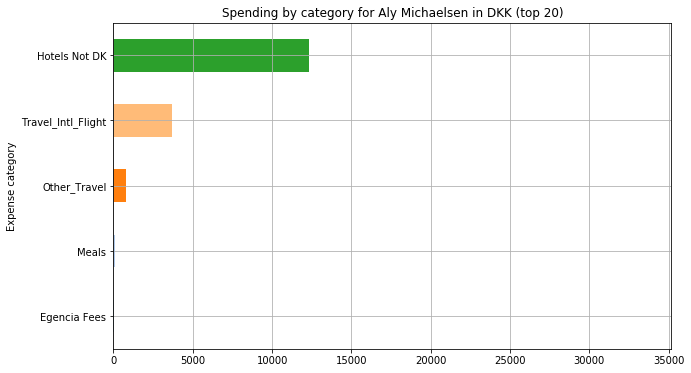

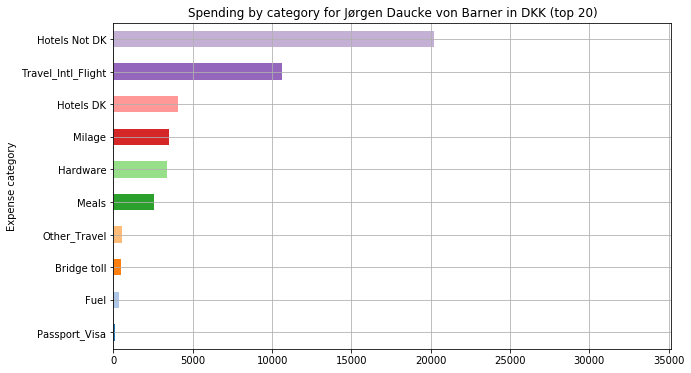

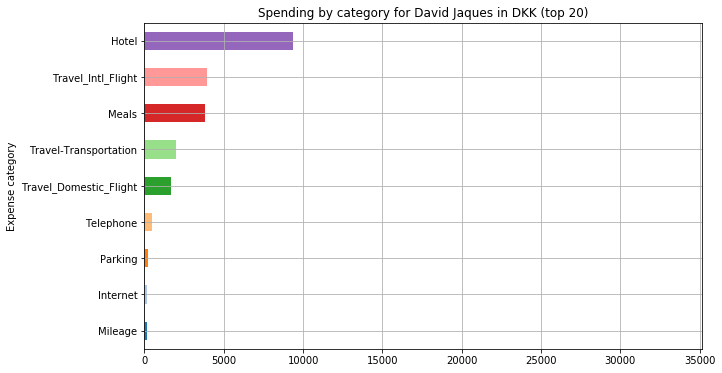

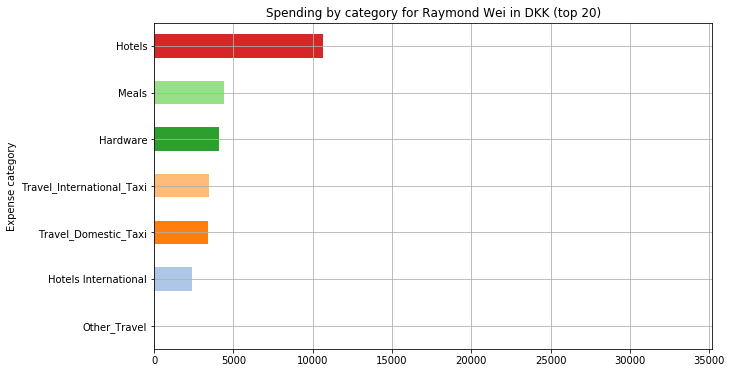

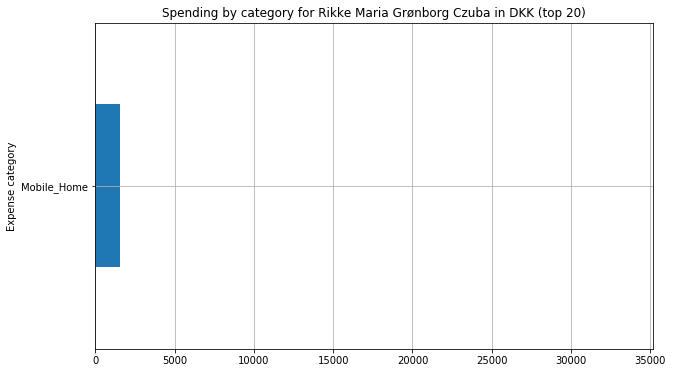

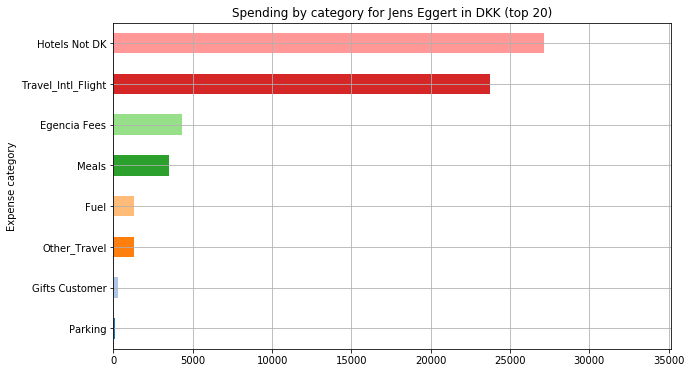

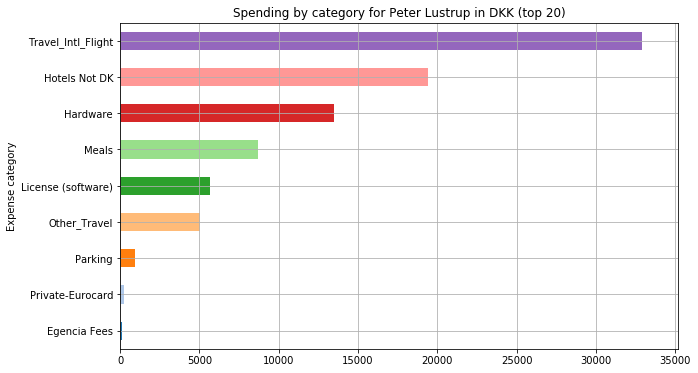

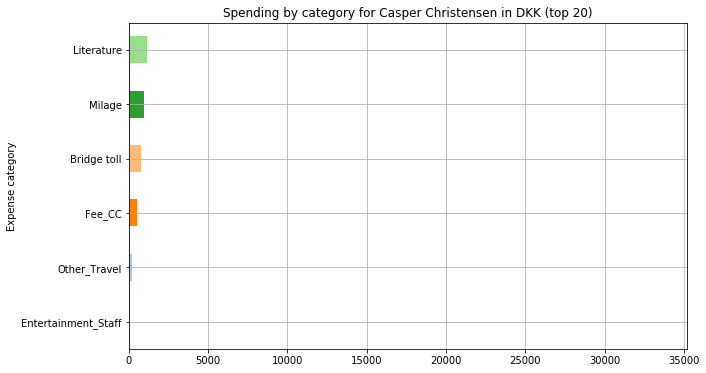

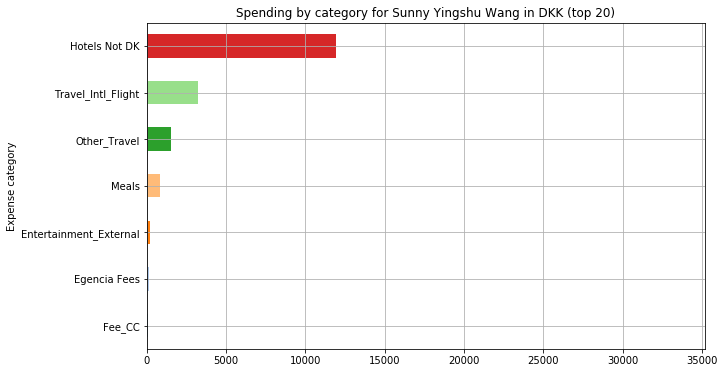

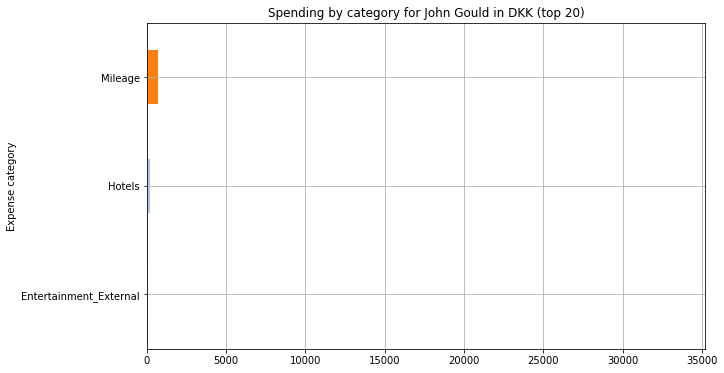

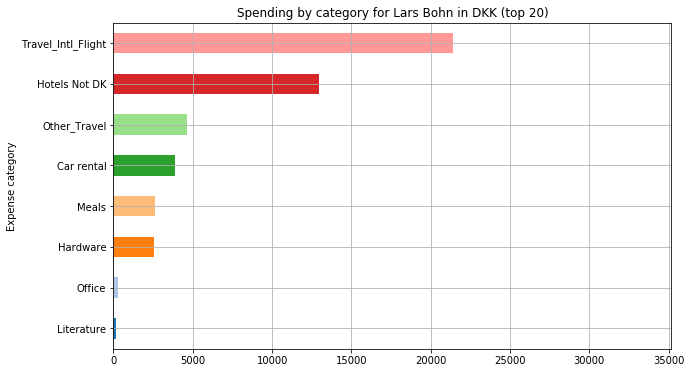

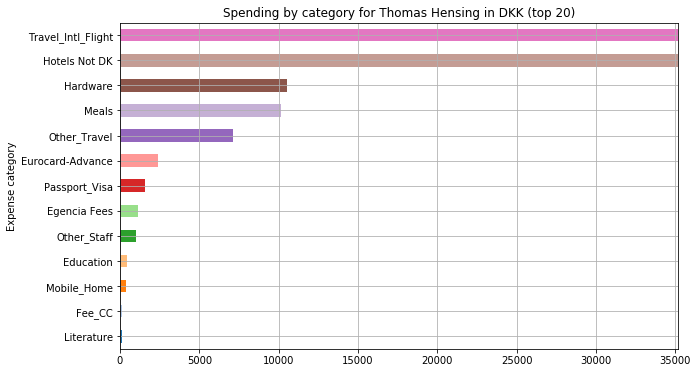

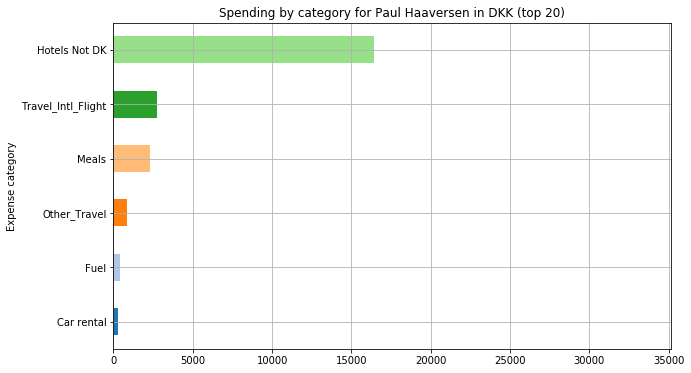

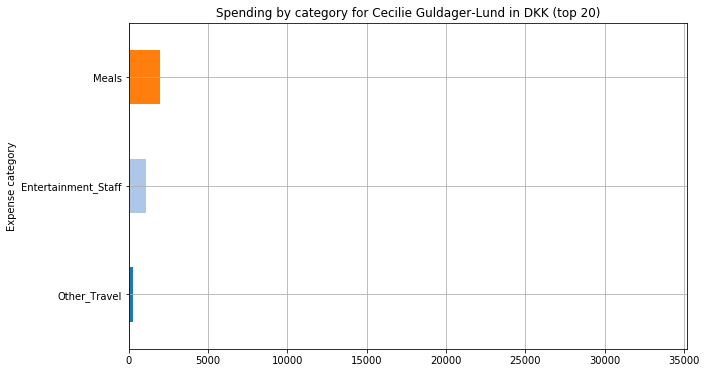

In [15]:
top_limit = max(clean_data["Transaction amount clean"])
worker_list = list(set(clean_data["Worker name"]))
colors = plt.cm.tab20(np.linspace(0, 1, top))


for worker_name in worker_list:
    worker_dataframe = clean_data.loc[clean_data['Worker name'] == worker_name]
    plt.title(f"Spending by category for {worker_name} in {base_currency} (top {top})")
    worker_dataframe.groupby('Expense category')["Transaction amount clean"].sum().sort_values().iloc[-top:].plot(kind='barh', figsize=custom_figsize, grid=True, xlim=(0, top_limit), color=colors)
    plt.show()

## 2.9.Biggest spenders per category? <a class="anchor" id="2.9"></a>

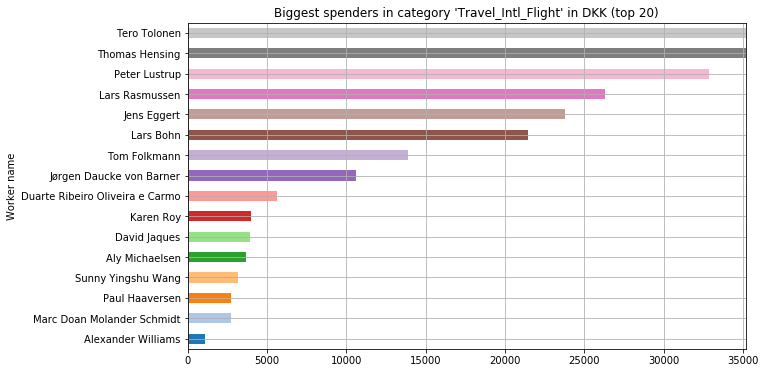

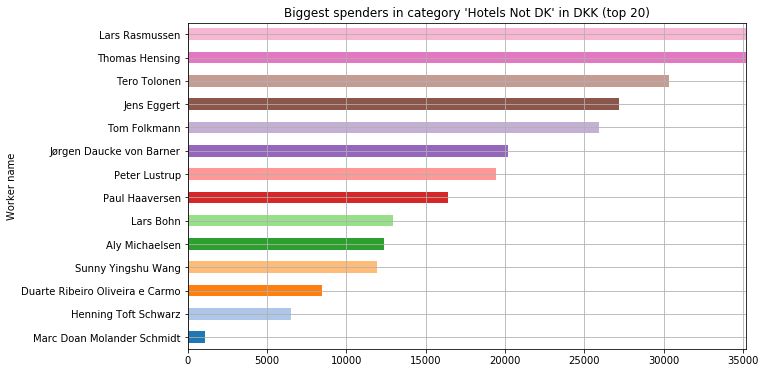

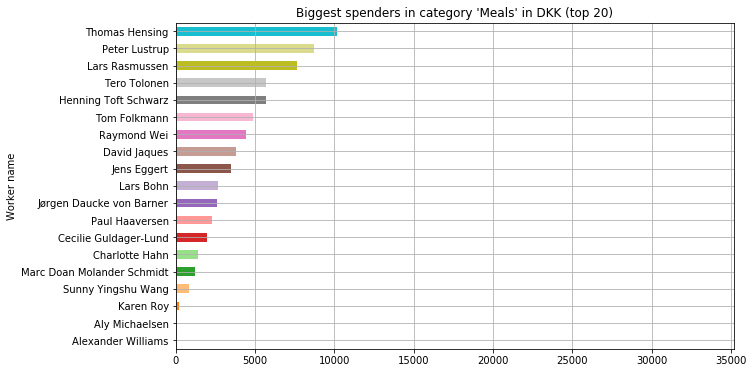

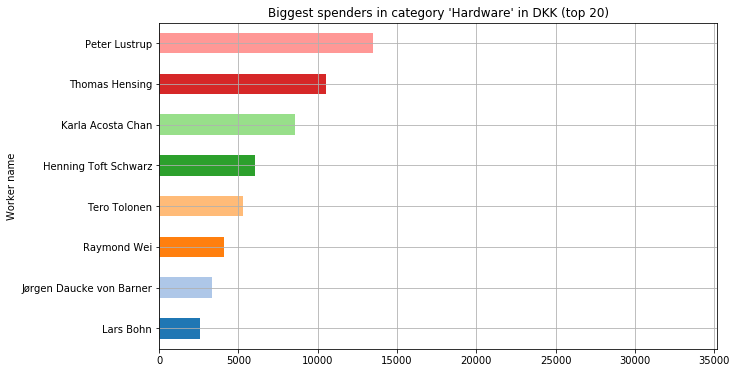

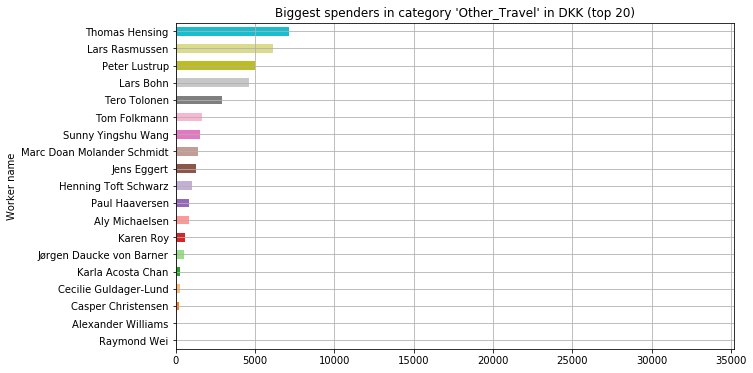

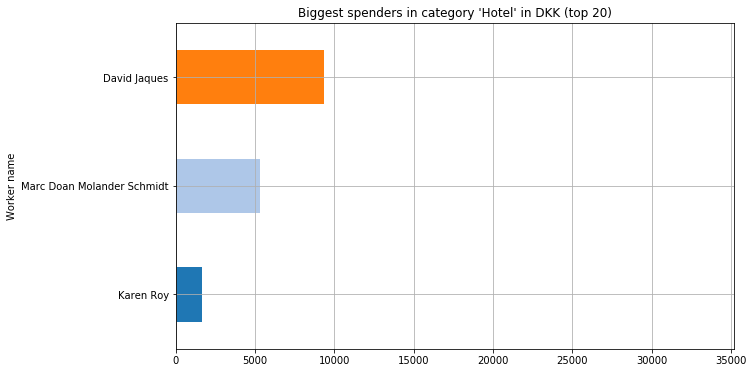

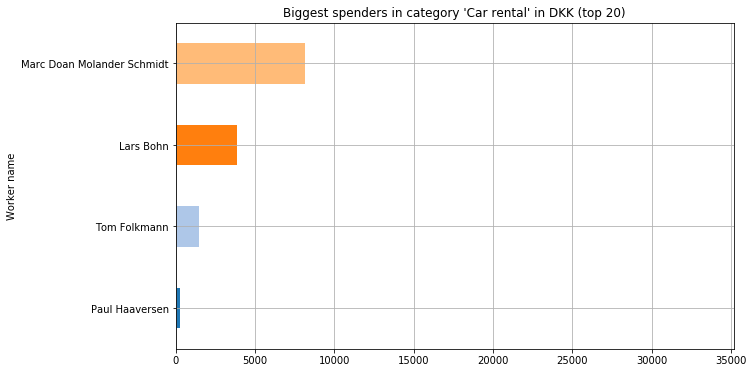

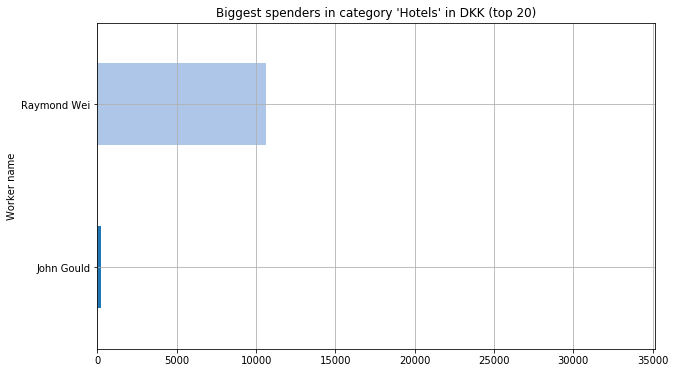

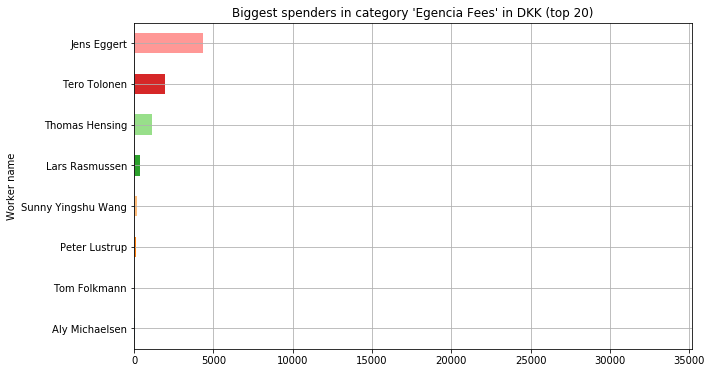

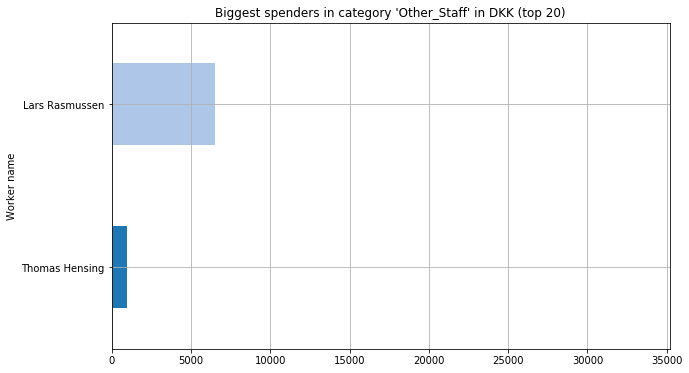

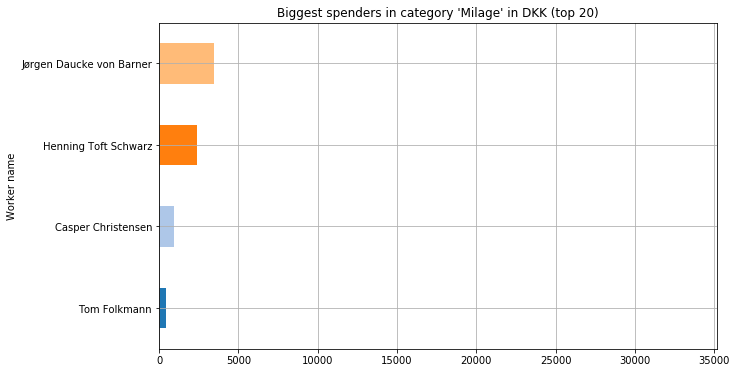

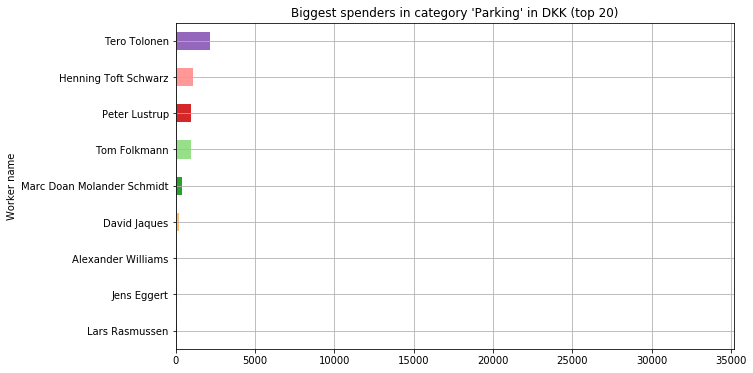

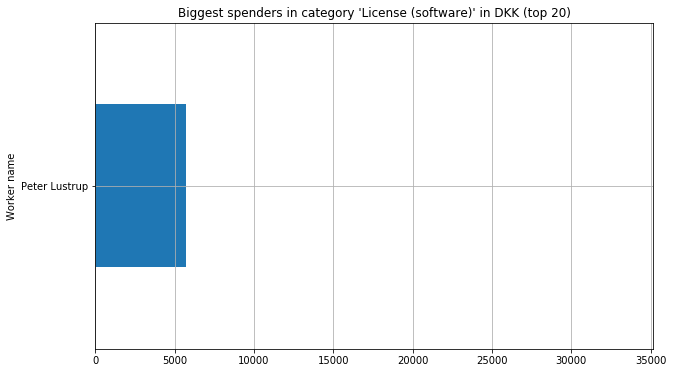

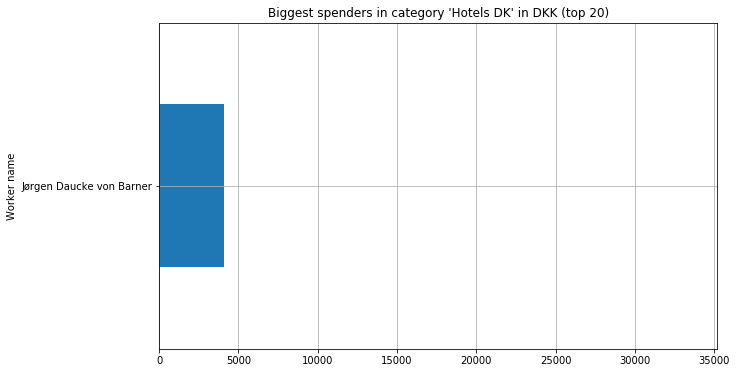

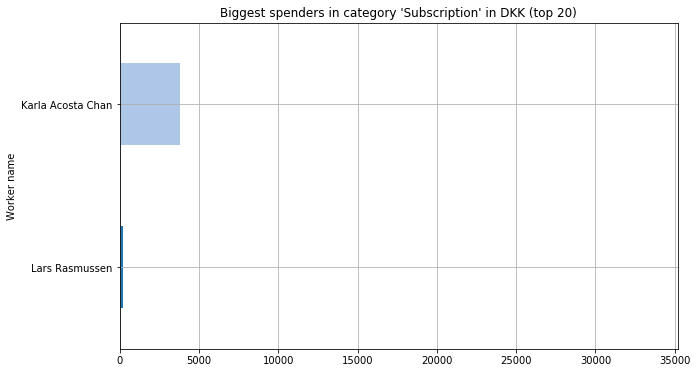

In [16]:
top_categories = clean_data.groupby('Expense category')["Transaction amount clean"].sum().sort_values(ascending=False)[:15]
top_categories_names = [name[0] for name in top_categories.iteritems()]

for category_name in top_categories_names:
    category_dataframe = clean_data.loc[clean_data['Expense category'] == category_name]
    
    plt.title(f"Biggest spenders in category '{category_name}' in {base_currency} (top {top})")
    category_dataframe.groupby('Worker name')["Transaction amount clean"].sum().sort_values().iloc[-top:].plot(kind='barh', figsize=custom_figsize, grid=True, xlim=(0, top_limit), color=colors)

    plt.show()

In [17]:
import os
os.system("""jupyter nbconvert "base.ipynb" --TagRemovePreprocessor.remove_cell_tags="{'hide'}" --TagRemovePreprocessor.remove_input_tags="{'hide_input'}"  --to=html""")

0